In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('dataset/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.shape

(2938, 22)

In [5]:
list(data.columns)

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [6]:
data.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [8]:
len(data['Country'].unique())

193

In [9]:
data.groupby('Status')["Status"].count()

Status
Developed      512
Developing    2426
Name: Status, dtype: int64

In [10]:
data.loc[:, ["Life_Expectancy", "Alcohol"]].groupby(data['Country']).describe().loc[['Morocco','Germany','France','Spain'],:]

Life_Expectancy                                                   \
                  count      mean       std   min     25%    50%     75%   
Country                                                                    
Morocco            16.0  72.15625  2.243797  68.6  70.725  72.15  73.675   
Germany            16.0  81.17500  3.379053  78.0  78.950  79.85  82.000   
France             16.0  82.21875  3.166958  78.8  80.575  81.60  82.250   
Spain              16.0  82.06875  2.792065  79.1  80.625  81.75  82.450   

              Alcohol                                                           
          max   count       mean       std    min    25%    50%     75%    max  
Country                                                                         
Morocco  77.0    15.0   0.518667  0.060340   0.43   0.46   0.54   0.560   0.62  
Germany  89.0    15.0  11.628667  0.568241  10.94  11.20  11.50  11.875  12.91  
France   89.0    15.0  12.404667  0.936695  11.10  11.75  12.20  13.335  13.89  
Spain    89.0    15.0  10.024000  2.974496   0.01   9.70  10.24  11.890  12.26

<AxesSubplot:>

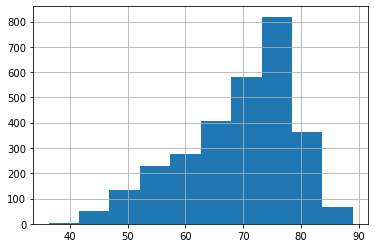

In [11]:
data['Life_Expectancy'].hist()

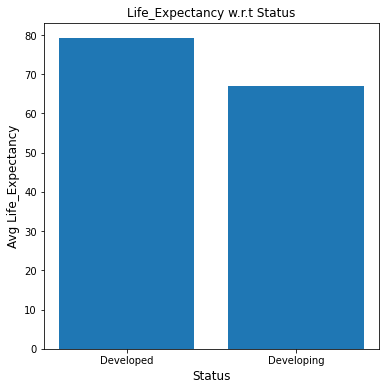

In [12]:
plt.figure(figsize=(6,6))
plt.bar(data.groupby('Status')['Status'].count().index, data.groupby('Status')['Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()

<AxesSubplot:title={'center':'Life_Expectancy'}, xlabel='Country'>

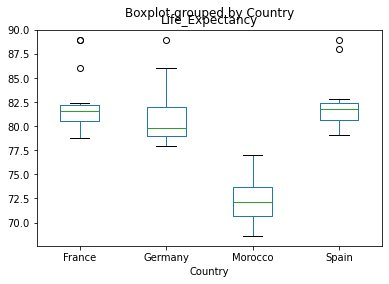

In [13]:
data[data.Country.isin(['Morocco','Germany','Spain','France'])].boxplot(by='Country', 
                       column=['Life_Expectancy'], 
                       grid=False)

<AxesSubplot:ylabel='Country'>

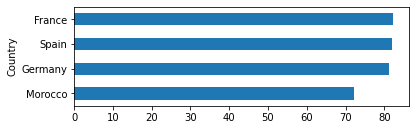

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
data[data.Country.isin(['Morocco','Germany','Spain','France'])].groupby('Country')['Life_Expectancy'].mean().sort_values().plot(kind='barh', ax=ax1)

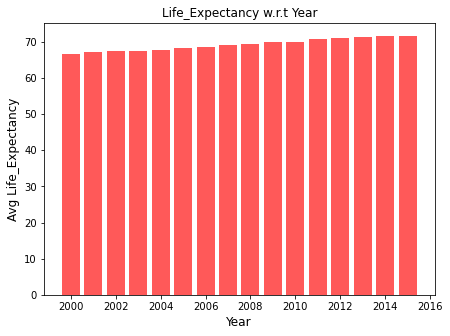

In [15]:
plt.figure(figsize=(7,5))
plt.bar(data.groupby('Year')['Year'].count().index, data.groupby('Year')['Life_Expectancy'].mean(),color='red',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

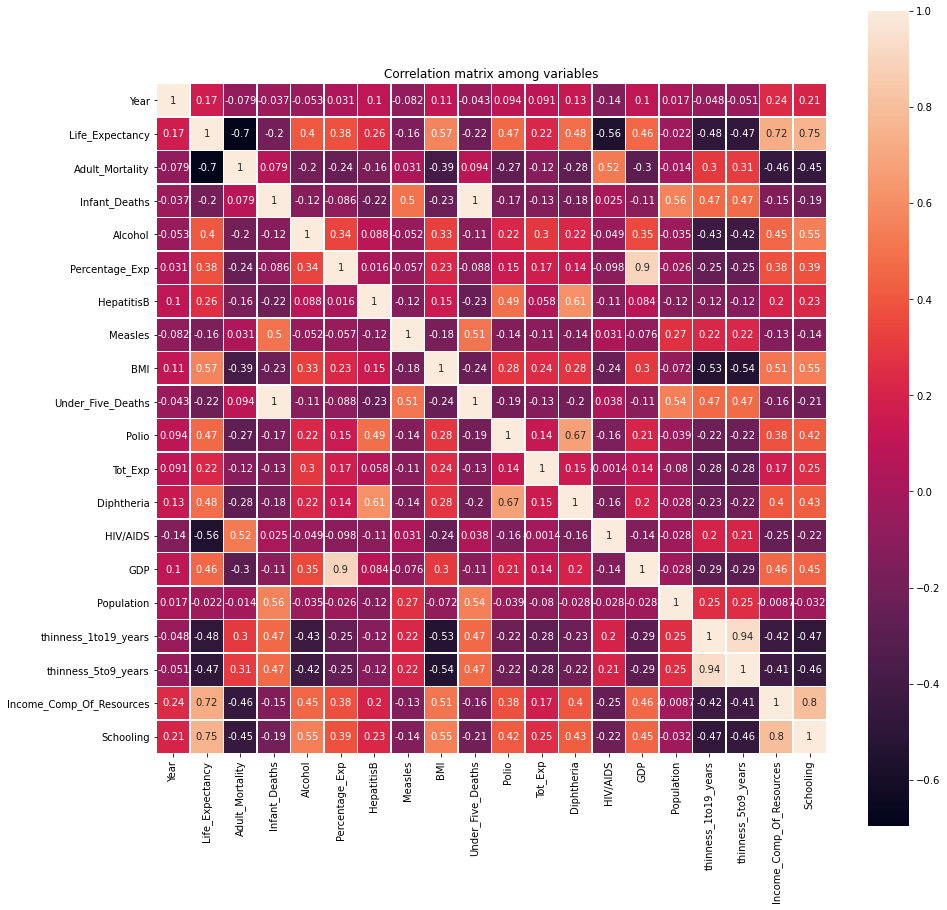

In [16]:
cormat = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among variables")
plt.show()

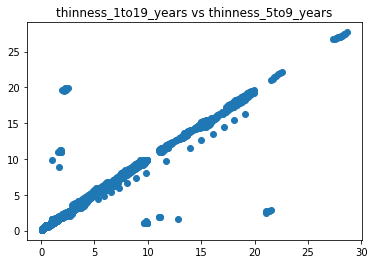

In [17]:
plt.scatter(data["thinness_5to9_years"], data["thinness_1to19_years"])
plt.title("thinness_1to19_years vs thinness_5to9_years")
plt.show()

In [18]:
data = data.drop(['thinness_5to9_years'], axis=1)

In [19]:
data.isnull().sum()*100/data.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

In [20]:
country_list = data.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB',
             'BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','thinness_1to19_years','Income_Comp_Of_Resources','Schooling']

In [21]:
for country in country_list:
    data.loc[data['Country'] == country,fill_list] = data.loc[data['Country'] == country,fill_list].interpolate()

In [22]:
data[np.isnan(data['Life_Expectancy'])]
data = data.drop(data.index[[624, 769, 1650,1715,1812,1909,1958,2167,2216,2713]])

In [23]:
def impute_col(row, col):
    mean_col = pd.DataFrame({'mean_col':pd.Series(np.round(data.groupby('Country')[col].mean(), 2))})
    if np.isnan(row[col]):
        cnt = row['Country']
        row[col] = mean_col.loc[cnt][0]
    return row

In [24]:
data = data.apply(impute_col, args=('Alcohol',) , axis=1)
data = data[data.Country != 'South Sudan']
data = data.drop(['HepatitisB'], axis=1)

In [25]:
data = data[data.Country != 'Sudan']
data = data.apply(impute_col, args=('Tot_Exp',) , axis=1)

In [26]:
data = data[~data['Country'].isin(["Democratic People's Republic of Korea","Somalia"])]

In [27]:
data = data.apply(impute_col, args=('GDP',) , axis=1)

In [28]:
data = data.drop(['GDP'], axis=1)

In [29]:
data = data.apply(impute_col, args=('Population',) , axis=1)

In [30]:
data = data.drop(['Population'], axis=1)

In [31]:
data = data.apply(impute_col, args=('Income_Comp_Of_Resources',) , axis=1)

In [32]:
data = data.drop(['Income_Comp_Of_Resources'], axis=1)

In [33]:
data = data.apply(impute_col, args=('Schooling',) , axis=1)
data = data.drop(['Schooling'], axis=1)

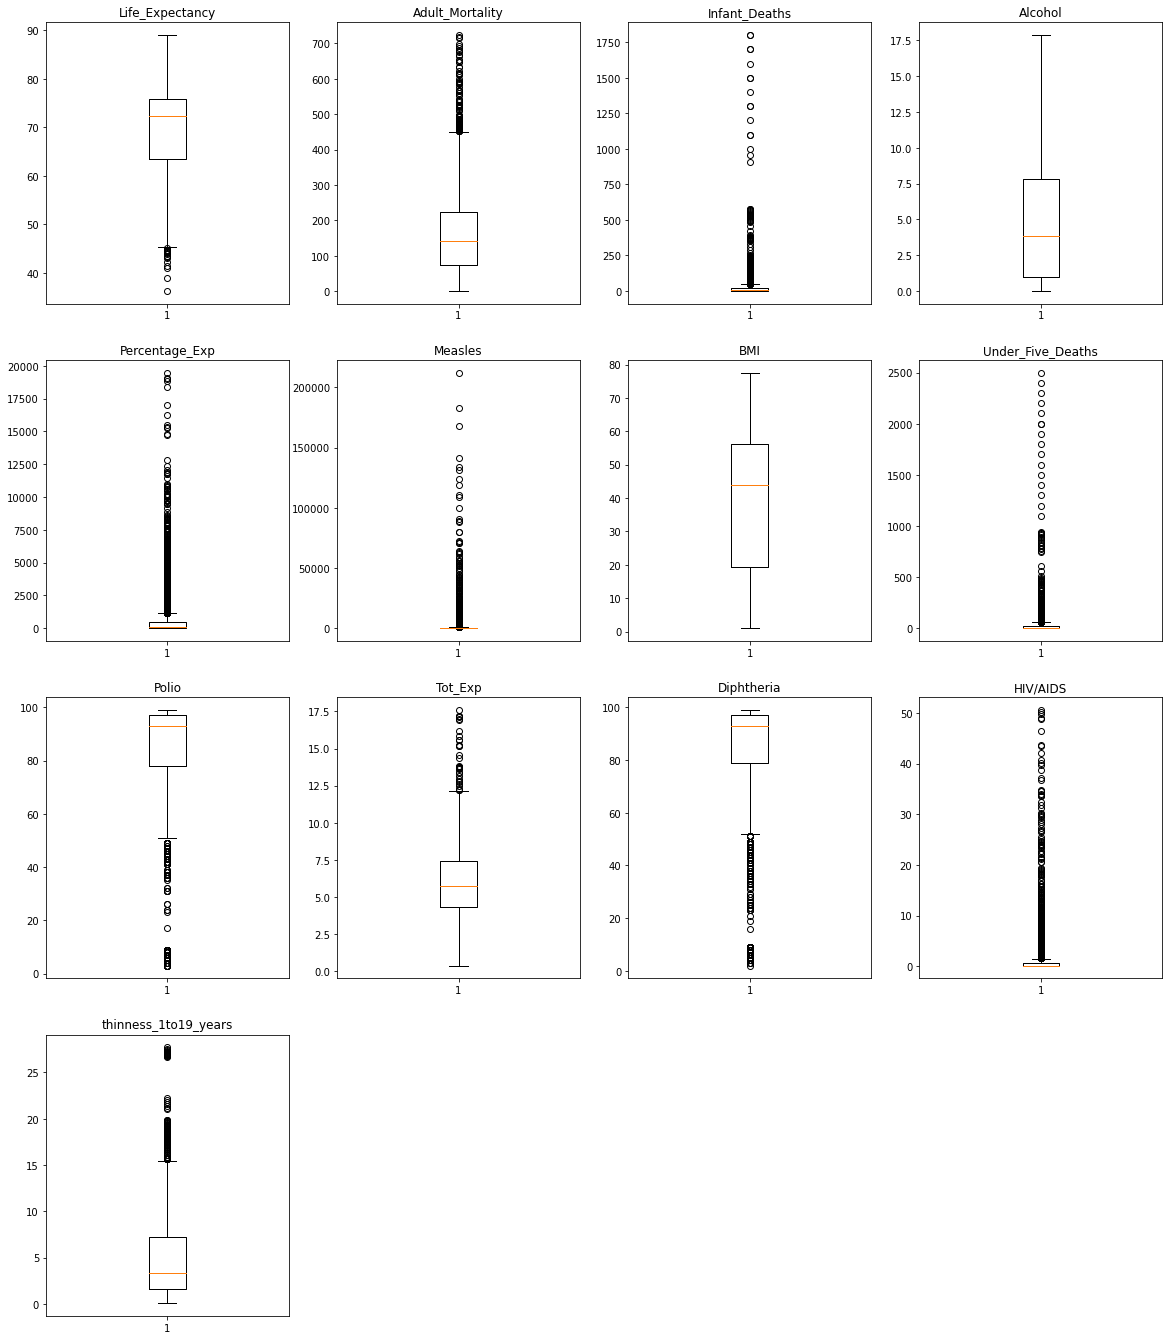

In [34]:
col_dict = {'Life_Expectancy':1, 'Adult_Mortality':2,
            'Infant_Deaths':3, 'Alcohol':4,
            'Percentage_Exp':5,'Measles':6,
            'BMI':7,'Under_Five_Deaths':8,
            'Polio':9,'Tot_Exp':10,
            'Diphtheria':11,'HIV/AIDS':12,
            'thinness_1to19_years':13}
plt.figure(figsize=(20,30))
for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(data[variable])
                     plt.title(variable)
plt.show()

In [35]:
import scipy.stats as stats
stats.ttest_ind(data.loc[data['Status']=='Developed','Life_Expectancy'],data.loc[data['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=29.36614038467105, pvalue=6.432298335457971e-166)

In [36]:
feature_df = data[['Country','Status','Adult_Mortality','Alcohol','HIV/AIDS','Polio','BMI', 'thinness_1to19_years','Life_Expectancy']]

In [37]:
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)

In [38]:
final['Adult_Mortality_scaled'] =final['Adult_Mortality'].apply(lambda x : ((x-np.min(final['Adult_Mortality']))/(np.max(final['Adult_Mortality'])-np.min(final['Adult_Mortality'])) * (20)))

In [39]:
final['Polio_scaled'] =final['Polio'].apply(lambda x : ((x-np.min(final['Polio']))/(np.max(final['Polio'])-np.min(final['Polio'])) * (20)))

In [40]:
final.to_csv('./final.csv',index = False) 

In [41]:
final = pd.read_csv('./final.csv')
final.head()

,Country,Adult_Mortality,Alcohol,HIV/AIDS,Polio,BMI,thinness_1to19_years,Life_Expectancy,Developing,Adult_Mortality_scaled,Polio_scaled
0,Afghanistan,263.0,0.01,0.1,6.0,19.1,17.2,65.0,1,7.257618,0.625000
1,Afghanistan,271.0,0.01,0.1,58.0,18.6,17.5,59.9,1,7.479224,11.458333
2,Afghanistan,268.0,0.01,0.1,62.0,18.1,17.7,59.9,1,7.396122,12.291667
3,Afghanistan,272.0,0.01,0.1,67.0,17.6,17.9,59.5,1,7.506925,13.333333
4,Afghanistan,275.0,0.01,0.1,68.0,17.2,18.2,59.2,1,7.590028,13.541667


In [42]:
countries = final.Country.unique()
country_dict = {'countries': list(countries)}
country_df = pd.DataFrame(country_dict)

In [43]:
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    return feature_layer(country_dict).numpy()

In [44]:
countries = feature_column.categorical_column_with_vocabulary_list(
 'countries', country_df['countries'])

In [45]:
countries_embedding = feature_column.embedding_column(countries, dimension=4)

In [46]:
countries_embedding =  demo(countries_embedding)

In [47]:
b = []
for embed in countries_embedding:
    b.extend([embed] * 16)

In [48]:
final['countries_embedding'] = pd.Series(b)

In [49]:
final['sum_countries_embedding'] = final['countries_embedding'].apply(lambda x: x.sum())

In [50]:
final =  final.rename(columns={"HIV/AIDS": "hivaids"})

In [51]:
feature_df = ['sum_countries_embedding','Adult_Mortality_scaled','Alcohol','hivaids','Polio_scaled','BMI', 'thinness_1to19_years','Developing']

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
x = final.loc[:,feature_df]
y = final.Life_Expectancy
model.fit(x, y)

LinearRegression()

In [53]:
print("Model slopes:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slopes:     [ 0.16172418 -0.92796605  0.21102392 -0.48839367  0.37563078  0.09373912
 -0.17195438 -3.64104585]
Model intercept: 67.4709964564062


In [54]:
y_predict = model.predict(x.values)
RMSE = np.sqrt(((y-y_predict)**2).values.mean())

results = pd.DataFrame()
results["Method"] = ["Linear Regression"]
results["RMSE"] = RMSE
results

,Method,RMSE
0,Linear Regression,4.943501


In [55]:
np.min(final['Life_Expectancy']), np.max(final['Life_Expectancy'])

(36.3, 89.0)

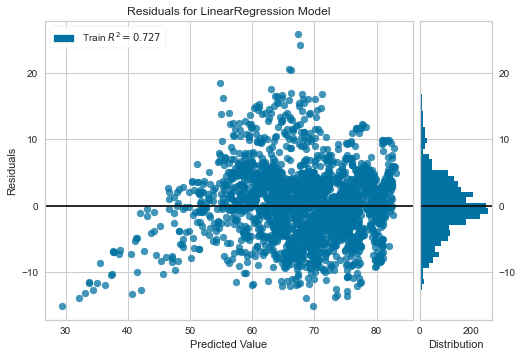

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(estimator = model)
visualizer.fit(x, y) 
visualizer.poof()

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
md = smf.mixedlm("Life_Expectancy ~ Adult_Mortality_scaled + Alcohol + Polio_scaled + hivaids + BMI + thinness_1to19_years + Developing", 
                 final, 
                 groups=final["sum_countries_embedding"], re_formula="~Adult_Mortality_scaled + Alcohol + Polio_scaled + hivaids + BMI + thinness_1to19_years + Developing") 

In [59]:
mdf = md.fit(method=["lbfgs"])
print(mdf.summary())

                            Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            Life_Expectancy
No. Observations:            2864               Method:                        REML           
No. Groups:                  179                Scale:                         2.8842         
Min. group size:             16                 Log-Likelihood:                -7072.2854     
Max. group size:             16                 Converged:                     Yes            
Mean group size:             16.0                                                             
----------------------------------------------------------------------------------------------
                                                   Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                          79.581    1.574 50.569 0.000

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2189: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2639: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


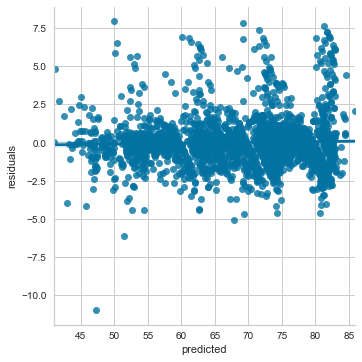

In [60]:
performance = pd.DataFrame()
performance["residuals"] = mdf.resid.values
performance["predicted"] = mdf.fittedvalues
sns.lmplot(x = "predicted", y = "residuals", data = performance)

In [61]:
y_predict = mdf.fittedvalues
RMSE = np.sqrt(((y-y_predict)**2).values.mean())
results.loc[3] = ["Mixed_Random_Slopes", RMSE]
results

,Method,RMSE
0,Linear Regression,4.943501
3,Mixed_Random_Slopes,1.556047


In [62]:
final = pd.read_csv('./final.csv')
final.head()

,Country,Adult_Mortality,Alcohol,HIV/AIDS,Polio,BMI,thinness_1to19_years,Life_Expectancy,Developing,Adult_Mortality_scaled,Polio_scaled
0,Afghanistan,263.0,0.01,0.1,6.0,19.1,17.2,65.0,1,7.257618,0.625000
1,Afghanistan,271.0,0.01,0.1,58.0,18.6,17.5,59.9,1,7.479224,11.458333
2,Afghanistan,268.0,0.01,0.1,62.0,18.1,17.7,59.9,1,7.396122,12.291667
3,Afghanistan,272.0,0.01,0.1,67.0,17.6,17.9,59.5,1,7.506925,13.333333
4,Afghanistan,275.0,0.01,0.1,68.0,17.2,18.2,59.2,1,7.590028,13.541667


In [63]:
final['Status'] = final['Developing'].map(lambda x: 'Developing' if x==1 else 'Developed')

In [64]:
train, test = train_test_split(final, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

1832 train examples
459 validation examples
573 test examples


In [65]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('Life_Expectancy')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [66]:
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val, shuffle=False, batch_size=16)
test_ds = df_to_dataset(test, shuffle=False, batch_size=16)

In [67]:
final_batch = next(iter(train_ds))[0]

In [68]:
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    return feature_layer(final_batch).numpy()

In [69]:
feature_columns = []
for header in ['Alcohol', 'HIV/AIDS', 'Polio_scaled','BMI','thinness_1to19_years']:
    feature_columns.append(feature_column.numeric_column(header))

In [70]:
status = feature_column.categorical_column_with_vocabulary_list(
      'Status', ['Developing', 'Developed'])

status = feature_column.indicator_column(status)
feature_columns.append(status)

In [71]:
country = feature_column.categorical_column_with_vocabulary_list(
      'Country', final.Country.unique())
country_embedding = feature_column.embedding_column(country, dimension=6)
feature_columns.append(country_embedding)

In [72]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'), 
  layers.Dense(16, activation='relu'), 
  layers.Dense(1)
])
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [73]:
history = model.fit(train_ds, validation_data=val_ds, epochs=40)

Epoch 1/40
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
48/58 [=======================>......] - ETA: 0s - loss: 1044.6876 - root_mean_squared_error: 32.3216WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'Country': <tf.Tensor 'IteratorGetNext:4' shape=(None,) dtype=string>, 'Adult_Mortality': <tf.Tensor 'IteratorGetNext:0' shape=(None,) dtype=float64>, 'Alcohol': <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=float64>, 'HIV/AIDS': <tf.Tensor 'IteratorGetNext:6' shape=(None,) dtype=float64>, 'Polio': <tf.Tensor 'IteratorGetNext:7' shape=(None,) dtype=float64>, 'BMI': <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=float64>, 'thinness_1to19_years': <tf.Tensor 'IteratorGetNext:10' shape=(None,) dtype=float64>, 'Developing': <tf.Tensor 'IteratorGetNext:5' shape=(None,) dtype=int64>, 'Adult_Mortality_scaled': <tf.Tensor 'IteratorGetNext:1' 

58/58 [==============================] - 0s 8ms/step - loss: 6.5159 - root_mean_squared_error: 2.5526 - val_loss: 21.6606 - val_root_mean_squared_error: 4.6541
Epoch 31/40
58/58 [==============================] - 0s 6ms/step - loss: 5.8550 - root_mean_squared_error: 2.4197 - val_loss: 15.9872 - val_root_mean_squared_error: 3.9984
Epoch 32/40
58/58 [==============================] - 0s 6ms/step - loss: 5.1991 - root_mean_squared_error: 2.2801 - val_loss: 15.8646 - val_root_mean_squared_error: 3.9830
Epoch 33/40
58/58 [==============================] - 0s 6ms/step - loss: 5.0161 - root_mean_squared_error: 2.2397 - val_loss: 14.8282 - val_root_mean_squared_error: 3.8507
Epoch 34/40
58/58 [==============================] - 0s 6ms/step - loss: 4.7679 - root_mean_squared_error: 2.1835 - val_loss: 15.1992 - val_root_mean_squared_error: 3.8986
Epoch 35/40
58/58 [==============================] - 0s 6ms/step - loss: 5.2182 - root_mean_squared_error: 2.2843 - val_loss: 15.0913 - val_root_mean_sq

In [74]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error,epoch
35,4.789985,2.188603,14.423737,3.797859,35
36,5.050078,2.247238,14.596739,3.820568,36
37,4.876579,2.208298,14.166772,3.763877,37
38,4.443542,2.107971,15.689957,3.961055,38
39,5.168264,2.273382,14.141622,3.760535,39


In [75]:
predictions = model.predict(test_ds)
y = np.concatenate([y for x, y in test_ds], axis=0)

Consider rewriting this model with the Functional API.


In [76]:
compare = pd.DataFrame({'predictions':predictions.reshape((-1,)), 'True': y})
compare.tail()

,predictions,True
568,72.789139,71.5
569,63.510372,59.8
570,49.501236,55.0
571,60.325844,59.0
572,60.445656,59.0


In [77]:
model_err = model.evaluate(test_ds)

36/36 [==============================] - 0s 3ms/step - loss: 7.3492 - root_mean_squared_error: 2.7109
